In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [214]:
# Read the train and test image data from csv

train_data = pd.read_csv("/Users/jayashreeshankar/Documents/GUVI/Final Project - sign language/sign_mnist_train.csv")
test_data = pd.read_csv("/Users/jayashreeshankar/Documents/GUVI/Final Project - sign language/sign_mnist_test.csv")

In [215]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [216]:
# Separate labels from pixel data and the first column is column name for train data

train_pixel_values = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values

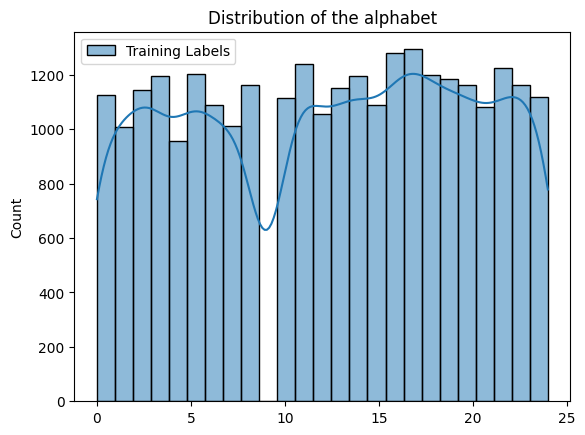

In [217]:
train_label_df = pd.DataFrame(train_labels, columns=['Training Labels'])

# Plot histogram
# train_label_df.hist()
sns.histplot(train_label_df, kde=True, bins=25)
plt.title("Distribution of the alphabet")
plt.show()

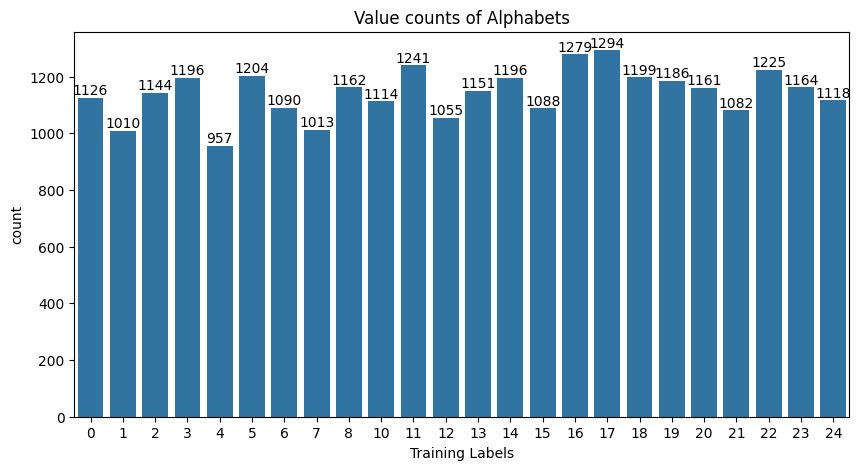

In [218]:
# Count plot

plt.figure(figsize=(10,5))
ax = sns.countplot(x=train_label_df['Training Labels'])

# Add values on top of each bar
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Get the x-coordinate of the bar
    x = p.get_x() + p.get_width() / 2
    # Add the text annotation
    ax.text(x, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Value counts of Alphabets')

plt.show()

In [219]:
train_pixel_values[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [220]:
# Calculate unique values and their counts
unique_values, counts = np.unique(train_labels, return_counts=True)

# Create a pandas Series for value counts (optional, for convenience)
value_counts = pd.Series(counts, index=unique_values).sort_index()
value_counts

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
dtype: int64

In [182]:
# Iterate through each row in pixel_values for train data

train_reshaped_images = []
for pixel_value in train_pixel_values:
    # Reshape the flattened image into 28x28
    image = np.array(pixel_value).reshape(28, 28)
    train_reshaped_images.append(image)

# Convert the list of reshaped images into a numpy array
train_reshaped_images = np.array(train_reshaped_images).astype('int64')

In [183]:
train_reshaped_images

array([[[107, 118, 127, ..., 170, 170, 169],
        [111, 121, 129, ..., 171, 171, 170],
        [113, 123, 131, ..., 171, 171, 171],
        ...,
        [142, 150, 159, ..., 202, 201, 200],
        [142, 151, 160, ..., 204, 203, 202],
        [142, 151, 160, ..., 204, 203, 202]],

       [[155, 157, 156, ..., 138,  92, 108],
        [158, 159, 159, ..., 142, 116, 143],
        [161, 161, 161, ..., 147, 125, 140],
        ...,
        [162, 159, 145, ...,  91, 101,  94],
        [153, 139, 115, ...,  97,  95, 120],
        [135, 116,  95, ..., 103, 135, 149]],

       [[187, 188, 188, ...,  66,  77,  83],
        [188, 189, 189, ...,  73,  73,  71],
        [190, 190, 190, ...,  74,  68,  61],
        ...,
        [212, 198, 175, ..., 195, 193, 192],
        [202, 179, 152, ..., 195, 194, 193],
        [198, 166, 132, ..., 195, 194, 195]],

       ...,

       [[174, 174, 174, ..., 160, 158, 156],
        [178, 178, 177, ..., 162, 160, 158],
        [181, 180, 180, ..., 164, 162, 161

In [184]:
# Separate labels from pixel data and the first column is column name for test data

test_pixel_values = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

In [185]:
# Iterate through each row in pixel_values for test data
test_reshaped_images = []
for pixel_value in test_pixel_values:
    # Reshape the flattened image into 28x28
    image = np.array(pixel_value).reshape(28, 28)
    test_reshaped_images.append(image)

# Convert the list of reshaped images into a numpy array
test_reshaped_images = np.array(test_reshaped_images).astype('int64')

In [186]:
test_labels.shape

(7172,)

In [187]:
train_labels.shape

(27455,)

In [188]:
test_reshaped_images[0].shape

(28, 28)

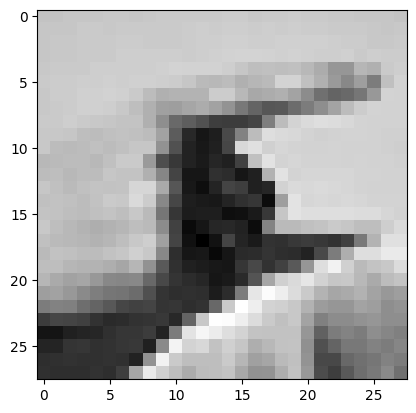

In [189]:
plt.imshow(test_reshaped_images[0], cmap='gray') # default cmap color pattern is virdis

In [190]:
from tensorflow.keras.utils import to_categorical

print(np.unique(train_labels))
train_label_catego = to_categorical(train_labels)
train_label_catego.shape

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


(27455, 25)

In [191]:
print(np.unique(test_labels))
test_label_catego = to_categorical(test_labels,num_classes=25)
test_label_catego.shape

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


(7172, 25)

In [192]:
train_labels.shape

(27455,)

In [193]:
test_labels.shape

(7172,)

In [194]:
train_reshaped_images[0].min()

42

In [195]:
train_reshaped_images[0].max()

207

In [196]:
scaled_train_images = train_reshaped_images/255
scaled_test_images = test_reshaped_images/255

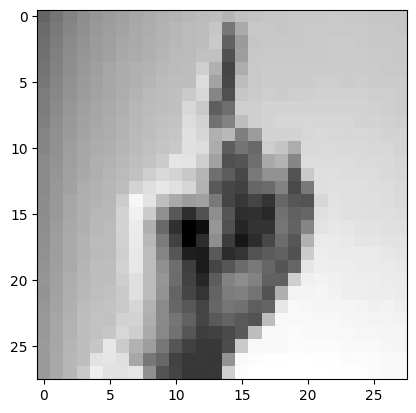

In [197]:
plt.imshow(scaled_train_images[0], cmap='gray')

In [81]:
scaled_train_images.shape

(27455, 28, 28)

In [86]:
scaled_test_images.shape

(7172, 28, 28)

In [87]:
# Batch size, width, height and color_channel

x_train = scaled_train_images.reshape(27455,28,28,1)
x_test = scaled_test_images.reshape(7172,28,28,1)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [93]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the input
model.add(Flatten())
model.add(Dense(128,activation='relu'))

# Output layer, activation is softmax as it is multi-classification problem, 25 neurons means 25 labels
model.add(Dense(25,activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train, train_label_catego,epochs=10,validation_data=(x_test, test_label_catego),callbacks=[early_stop])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4907 - loss: 1.8489 - val_accuracy: 0.8090 - val_loss: 0.6100
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9752 - loss: 0.1494 - val_accuracy: 0.8516 - val_loss: 0.5594
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9997 - loss: 0.0271 - val_accuracy: 0.8511 - val_loss: 0.6348


In [97]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.725915,1.021820,0.808979,0.609999
1,0.986560,0.101730,0.851645,0.559400
2,0.999818,0.021216,0.851088,0.634792


<Axes: >

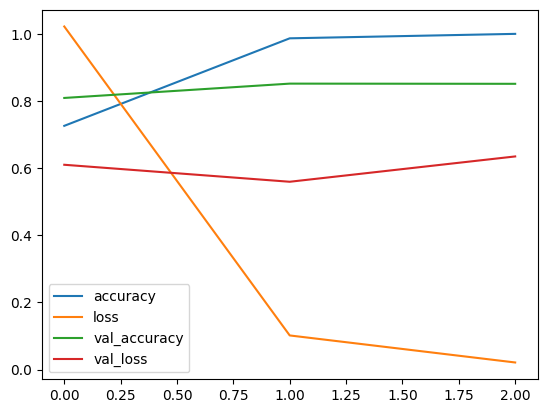

In [98]:
metrics.plot()

<Axes: >

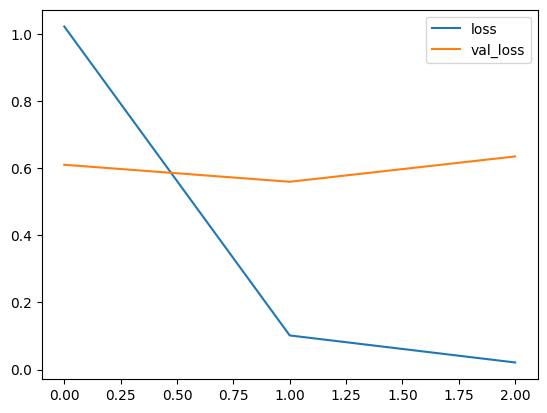

In [99]:
metrics[['loss','val_loss']].plot()
# As the val_loss is increasing, early stop happened

<Axes: >

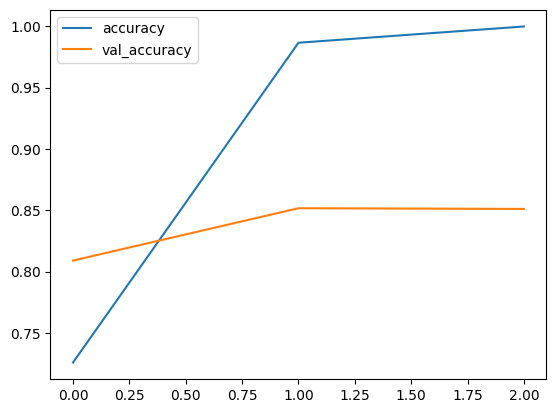

In [100]:
metrics[['accuracy','val_accuracy']].plot()

In [102]:
model.evaluate(x_test, test_label_catego, verbose=0)
# verbose 0 means we dont see the actual data running through the model
# it shows the loss and accuracy. Here the loss is very high

[0.6347919702529907, 0.8510875701904297]

In [103]:
model.metrics_names

['loss', 'compile_metrics']

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

predictions_prob = model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)
print(classification_report(y_true=test_labels, y_pred=predictions))

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       331
           1       0.99      0.95      0.97       432
           2       1.00      0.93      0.96       310
           3       0.86      0.99      0.92       245
           4       0.88      0.99      0.93       498
           5       0.80      1.00      0.89       247
           6       0.90      0.84      0.87       348
           7       0.83      0.92      0.87       436
           8       0.83      0.78      0.81       288
          10       0.82      0.80      0.81       331
          11       0.77      1.00      0.87       209
          12       0.81      0.68      0.74       394
          13       0.71      0.70      0.70       291
          14       0.90      0.74      0.81       246
          15       0.94      1.00      0.97       347
          16       0.86      0.87      0.86       164
          17       0.98      0.42     

In [110]:
confusion_matrix(test_labels,predictions)

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 411,   0,   0,   0,   0,   0,   0,   0,  21,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 288,   0,   0,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 243,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 494,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 292,  25,   0,   0,   0,   0,   0,
          0,   7,  22,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,  33

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(test_labels,predictions),annot=True)

In [115]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#adding another Conv2D and Pooling
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the input
model.add(Flatten())
model.add(Dense(128,activation='relu'))

# Output layer, activation is softmax as it is multi-classification problem, 25 neurons means 25 labels
model.add(Dense(25,activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train, train_label_catego,epochs=10,validation_data=(x_test, test_label_catego),callbacks=[early_stop])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4586 - loss: 1.8074 - val_accuracy: 0.8475 - val_loss: 0.4786
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9781 - loss: 0.0967 - val_accuracy: 0.9087 - val_loss: 0.3041
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9987 - loss: 0.0133 - val_accuracy: 0.9162 - val_loss: 0.3578


In [117]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.708614,0.966754,0.847462,0.478560
1,0.988818,0.059189,0.908673,0.304139
2,0.997851,0.014397,0.916202,0.357758


In [ ]:
!pip install scikeras

In [135]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam', kernel_initializer='uniform'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer=kernel_initializer))
    model.add(Dense(32, activation='relu', kernel_initializer=kernel_initializer))
    model.add(Dense(25, activation='softmax', kernel_initializer=kernel_initializer))  # 25 classes
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
    
model = KerasClassifier(model=create_model, verbose=0)


# Define parameter grid
# param_grid = {
#     'batch_size': [10, 20, 30],
#     'epochs': [10, 20],
#     'model__optimizer': ['adam', 'rmsprop'],
#     'model__kernel_initializer': ['uniform', 'normal']
# }
param_grid = {
    'batch_size': [10, 20],
    'epochs': [10],
    'model__optimizer': ['adam'],
    'model__kernel_initializer': ['uniform']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, train_label_catego)

# Print best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.9995264952510062 using {'batch_size': 20, 'epochs': 10, 'model__kernel_initializer': 'uniform', 'model__optimizer': 'adam'}


In [129]:
x_train.shape

(27455, 28, 28, 1)

In [130]:
train_label_catego.shape

(27455, 25)

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__kernel_initializer': ['uniform', 'normal']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Fit RandomizedSearchCV
random_result = random_search.fit(x_train, train_label_catego)

# Print best parameters and score
print(f"Best: {random_result.best_score_} using {random_result.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential mode

Best: 1.0 using {'model__optimizer': 'rmsprop', 'model__kernel_initializer': 'normal', 'epochs': 10, 'batch_size': 20}


In [146]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#adding another Conv2D and Pooling
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# Flatten the input
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))  # Dropout layer added
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))  # Dropout layer added. Adding dropout helped in improving the accuracy.

# Output layer, activation is softmax as it is multi-classification problem, 25 neurons means 25 labels
model.add(Dense(25,activation='softmax'))


# Compile the model - Tried the best params suggested by GridSearch CV and there is no much improvement. So picking the params from RandomSearchCV
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [147]:
#early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train, train_label_catego,epochs=10,batch_size=20,validation_data=(x_test, test_label_catego))

Epoch 1/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1580 - loss: 2.7572 - val_accuracy: 0.6846 - val_loss: 0.9289
Epoch 2/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6438 - loss: 1.0339 - val_accuracy: 0.8544 - val_loss: 0.4242
Epoch 3/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8216 - loss: 0.5205 - val_accuracy: 0.8982 - val_loss: 0.3151
Epoch 4/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8938 - loss: 0.3130 - val_accuracy: 0.9317 - val_loss: 0.2479
Epoch 5/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9284 - loss: 0.2262 - val_accuracy: 0.9364 - val_loss: 0.2353
Epoch 6/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9443 - loss: 0.1811 - val_accuracy: 0.9332 - val_loss: 0.2678
Epoch 7/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9480 - loss: 0.1694 - val_accuracy: 0.9398 - val_loss: 0.2257
Epoch 8/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9520 - loss: 0.1659 - 

In [148]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.314588,2.171334,0.684607,0.928879
1,0.703223,0.861743,0.854434,0.424178
2,0.845347,0.453814,0.898215,0.315113
3,0.905992,0.282783,0.931679,0.247925
4,0.930905,0.215477,0.936419,0.235328
5,0.944491,0.175565,0.933213,0.267832
6,0.950282,0.163363,0.939766,0.225692
7,0.951557,0.166561,0.942694,0.212869
8,0.950246,0.176249,0.925125,0.260823
9,0.953961,0.162839,0.938093,0.244861


<Axes: >

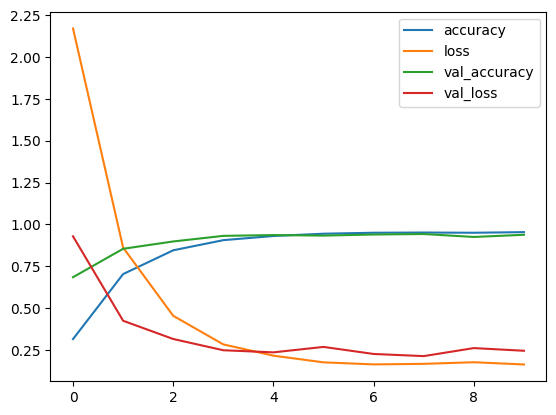

In [149]:
metrics.plot()

<Axes: >

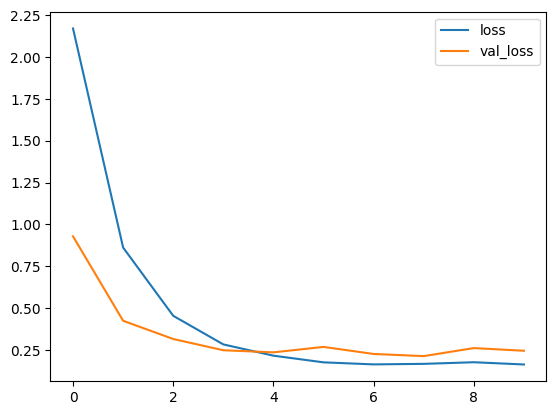

In [150]:
metrics[['loss','val_loss']].plot()

<Axes: >

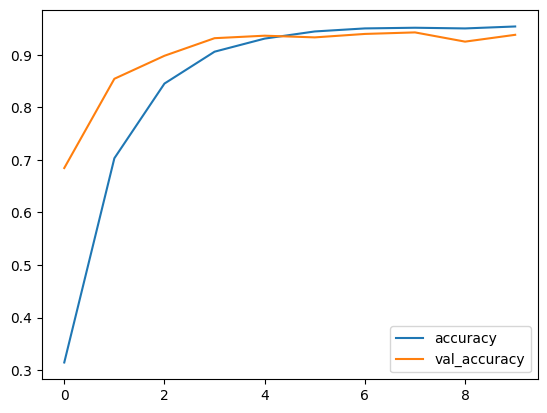

In [151]:
metrics[['accuracy','val_accuracy']].plot()

In [152]:
model.evaluate(x_test, test_label_catego, verbose=0)

[0.24486128985881805, 0.9380925893783569]

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

predictions_prob = model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)
print(classification_report(y_true=test_labels, y_pred=predictions))

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       331
           1       1.00      0.95      0.98       432
           2       1.00      0.84      0.91       310
           3       1.00      0.91      0.96       245
           4       0.96      0.95      0.96       498
           5       0.96      1.00      0.98       247
           6       0.89      0.99      0.94       348
           7       0.90      0.95      0.93       436
           8       0.89      0.88      0.88       288
          10       0.93      0.95      0.94       331
          11       0.96      1.00      0.98       209
          12       0.86      0.93      0.89       394
          13       0.98      0.71      0.82       291
          14       0.86      1.00      0.93       246
          15       0.99      0.98      0.99       347
          16       0.96      1.00      0.98       164
          17       0.87      0.97      0

In [167]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator with normalization and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the data generator to augment and normalize training data
train_generator = datagen.flow(x_train, train_label_catego, batch_size=20)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255)

 
validation_generator = validation_datagen.flow(x=x_test,
                                                 y=test_label_catego,
                                                 batch_size=32) 

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455, 25)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172, 25)


In [174]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')])
  

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
  
    return model

In [175]:
model = create_model()

In [176]:

# Train our model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0460 - loss: 3.1890 - val_accuracy: 0.0344 - val_loss: 3.1950
Epoch 2/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0439 - loss: 3.1781 - val_accuracy: 0.0201 - val_loss: 3.1935
Epoch 3/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0443 - loss: 3.1785 - val_accuracy: 0.0201 - val_loss: 3.2056
Epoch 4/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0466 - loss: 3.1764 - val_accuracy: 0.0201 - val_loss: 3.2027
Epoch 5/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0470 - loss: 3.1765 - val_accuracy: 0.0343 - val_loss: 3.2045
Epoch 6/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0453 - loss: 3.1762 - val_accuracy: 0.0229 - val_loss: 3.2026
Epoch 7/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0463 - loss: 3.1770 - val_accuracy: 0.0201 - val_loss: 3.2005
Epoch 8/30
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0459 - loss: 3.1765 - 

## The overall acccuracy is 94% 